The beta distribution is a convenient distribution for modeling a probability or proportion.  If $\theta$ is a random variable with $\theta \sim Beta(a, b) (where $a$ and $b$ are parameters of the Beta distribution), then:

\begin{align*}
f(\theta | a, b) &= \begin{cases}
  \frac{\Gamma(a + b)}{\Gamma(a) \Gamma(b)} \theta^{(a - 1)} (1 - \theta)^{(b - 1)} \text{, if $0 \leq \theta \leq 1$} \\
  0 \text{ otherwise}
  \end{cases} \\
E(\theta) &= \frac{a}{a + b} \\
Var(\theta) &= \frac{ab}{(a + b)^2(a + b + 1)}
\end{align*}

Here are a few plots of beta distributions for various values of $a$ and $b$:

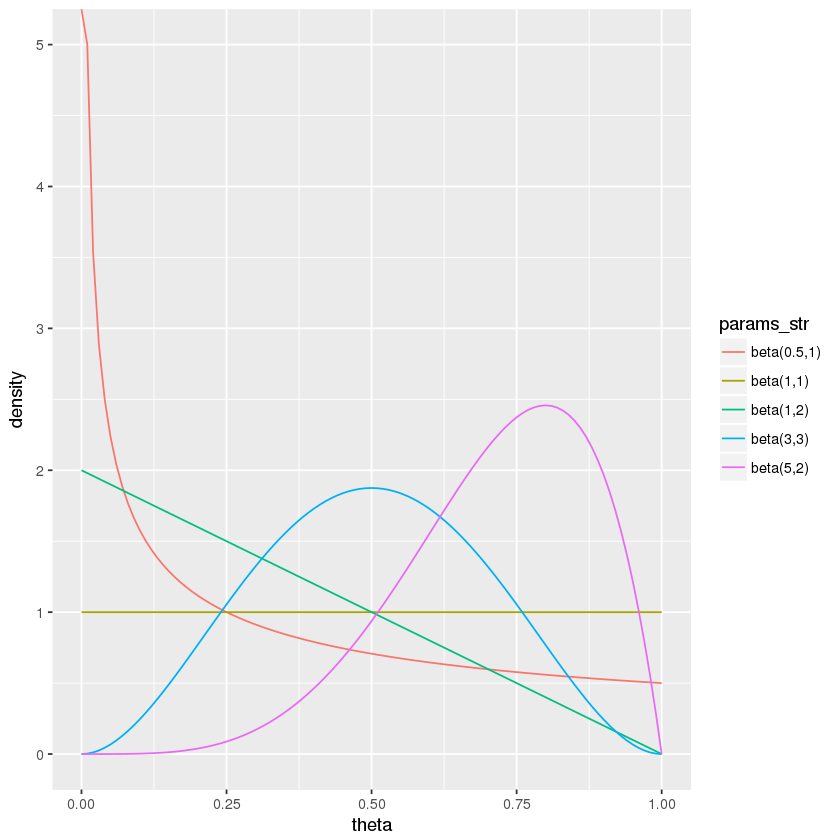

In [6]:
library(tidyverse)

#' Function to evaluate the beta density function for one specified set of parameter values
#'
#' @param a first shape parameter for beta distribution
#' @param b second shape parameter for beta distribution
#' 
#' @return a data frame with three variables:
#'   1. theta is a range of possible values for theta, from 0 to 1;
#'   2. density is the beta(a, b) density function evaluated at each value of theta
#'   3. params_str is a string describing the beta distribution used
get_density_grid <- function(a, b) {
    # Grid of values for theta at which we will evaluate the density function f(\theta | a, b)
    theta_grid <- seq(from = 0, to = 1, length = 101)
    
    # beta density function evaluated along theta_grid for the given values of a, b
    density <- dbeta(theta_grid, a, b)
    
    return(data.frame(
        theta = theta_grid,
        density = density,
        params_str = paste0("beta(", a, ",", b ,")"),
        stringsAsFactors = FALSE
    ))
}

param_combinations <- data.frame(
    a = c(1, 1, 0.5, 3, 5),
    b = c(1, 2, 1,   3, 2)
)

df_to_plot <- pmap_dfr(param_combinations, get_density_grid)

ggplot() +
  geom_line(mapping = aes(x = theta, y = density, color = params_str), data = df_to_plot)


Consider the question: what proportion of Peanut M \& M's are blue?  Play around with the parameter values $a$ and $b$ in the above code until you get a beta distribution that you feel accurately represents your personal subjective distribution over values of $\theta$, where $\theta$ represents the proportion of Peanut M \& M's that are blue.  It may be helpful to experiment with using the `pbeta` function to find the probability that $\theta$ falls in different intervals, and make sure that agrees with your personal assessment of that probability.